# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Sushma Pamidi

Github URL: https://github.com/pamidisushma02/Module7-Assignment.git




Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Question 1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests

article_page = requests.get('https://www.worldbank.org/en/news/press-release/2022/09/15/risk-of-global-recession-in-2023-rises-amid-simultaneous-rate-hikes')
article_html = article_page.text

import pickle
with open('worldbank_article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

Question 2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [26]:
with open('worldbank_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

from bs4 import BeautifulSoup

soup = BeautifulSoup(article_html, 'html5lib')

article_element = soup.find('article')

#print(article_element.get_text())


import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())


print(f'Sentiment Analysis: {doc._.blob.sentiment}')
print("=============================")

print(f'Polarity: {doc._.polarity}')
print("=============================")

print(f'Sentiment Analysis: {doc._.blob.sentiment_assessments.assessments}')
print("=============================")



Sentiment Analysis: Sentiment(polarity=0.021268426562544206, subjectivity=0.28898324986560275)
Polarity: 0.021268426562544206
Sentiment Analysis: [(['central'], 0.0, 0.25, None), (['global'], 0.0, 0.0, None), (['financial'], 0.0, 0.0, None), (['lasting'], 0.0, 0.0, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['past'], -0.25, 0.25, None), (['likely'], 0.0, 1.0, None), (['next'], 0.0, 0.0, None), (['currently', 'expected'], -0.1, 0.4, None), (['other'], -0.125, 0.375, None), (['global'], 0.0, 0.0, None), (['back'], 0.0, 0.0, None), (['down'], -0.15555555555555559, 0.2888888888888889, None), (['central'], 0.0, 0.25, None), (['global'], 0.0, 0.0, None), (['more'], 0.5, 0.5, None), (['global'], 0.0, 0.0, None), (['double'], 0.0, 0.0, None), (['average'], -0.15, 0.39999999999999997, None), (['global'], 0.0, 0.0, None), (['consistent'], 0.25, 0.25, None), (['central'], 0.0, 0.25, None), (['global'], 0.0, 0.0, None), (['slow'], -0.30000000000000004, 0.39999999999999997, 

In [75]:
#Count number of sentences in the article

sentences = list(doc.sents)
count = 0

for sentence in sentences:
    count += 1
    
print('')
print("Total Number of sentences:",count) #print the list of scores

print(sentences)


Total Number of sentences: 46
[
        
        Study Highlights Need for Policies to Curb Inflation Without Exacerbating Recession RiskWASHINGTON, September 15, 2022—As central banks across the world simultaneously hike interest rates in response to inflation, the world may be edging toward a global recession in 2023 and a string of financial crises in emerging market and developing economies that would do them lasting harm, according to a comprehensive new study by the World Bank., Central banks around the world have been raising interest rates this year with a degree of synchronicity not seen over the past five decades—a trend that is likely to continue well into next year, according to the report., Yet the currently expected trajectory of interest-rate increases and other policy actions may not be sufficient to bring global inflation back down to levels seen before the pandemic., Investors expect central banks to raise global monetary-policy rates to almost 4 percent through 2023

Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [31]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())


from collections import Counter

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_token = [token for token in doc if we_care_about(token)]

for j in range(len(interesting_token)):
    interesting_token[j] = str(interesting_token[j])
    interesting_token[j] = interesting_token[j].lower()

word_freq = Counter(map(str,interesting_token))

print("The 5 most frequent tokens: ",word_freq.most_common(5))

The 5 most frequent tokens:  [('global', 24), ('inflation', 13), ('recession', 10), ('growth', 10), ('policy', 9)]


Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [32]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("The 5 most frequent lemmas: ",lemma_freq.most_common(5))

The 5 most frequent lemmas:  [('global', 24), ('policy', 15), ('inflation', 13), ('recession', 13), ('bank', 11)]


Question 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


List of scores of every sentence in the article using tokens [34, 16, 14, 16, 22, 16, 20, 8, 15, 13, 14, 8, 3, 7, 8, 9, 7, 10, 7, 12, 21, 12, 6, 20, 7, 13, 7, 10, 6, 10, 7, 10, 8, 4, 8, 10, 4, 9, 6, 4, 8, 10, 4, 4, 9, 2]



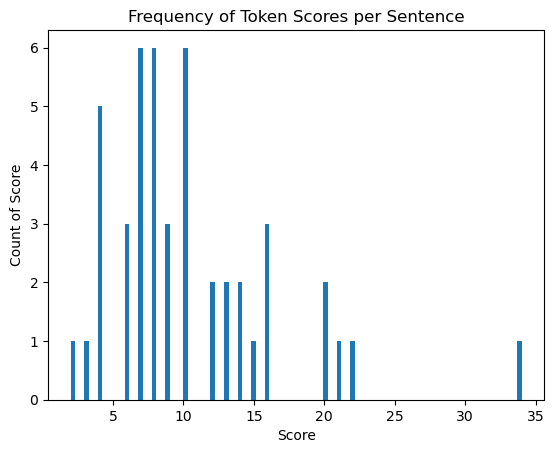

In [71]:
sentences = list(doc.sents) 

scores = [] #list of scores)

for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_token: #using tokens
            count += 1
    
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    #print(count,':', sent_str) # prints scores for each sentence as suggested in the question
   
    scores.append(count)  #append scores for each line

print('')
print("List of scores of every sentence in the article using tokens",scores) #print the list of scores
print('')

#Ploting histogram
from matplotlib import pyplot as plt
import numpy as np

plt.hist(scores, bins=100)

plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.title('Frequency of Token Scores per Sentence')
plt.show()

#From the histogram, the most common range of scores seems to be 5-10

Question 6: Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


List of scores using Lemmas [41, 18, 15, 18, 26, 19, 21, 9, 20, 15, 14, 10, 6, 9, 10, 10, 8, 14, 8, 15, 22, 14, 11, 21, 12, 16, 10, 13, 8, 11, 11, 14, 12, 5, 12, 13, 6, 11, 7, 5, 8, 14, 5, 6, 13, 2]


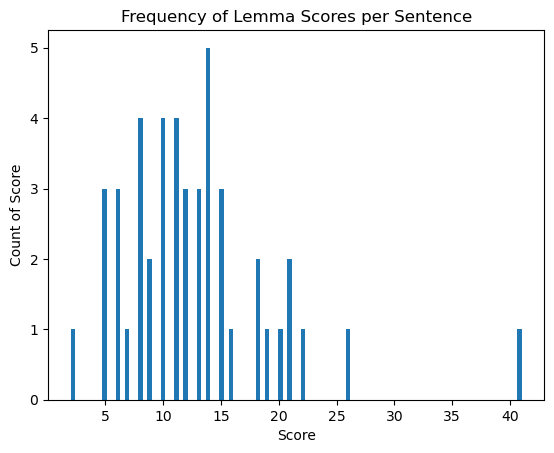

In [43]:
sentences = list(doc.sents)

scores = [] #list of scores)

for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas: #using lemmas
            count += 1
    
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    #print(count,':', sent_str) # prints scores for each sentence as suggested in the question
    scores.append(count)  #append scores for each line

print('')
print("List of scores using Lemmas",scores) #print the list of scores

#Ploting histogram
from matplotlib import pyplot as plt
import numpy as np

plt.hist(scores, bins=100)

plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.title('Frequency of Lemma Scores per Sentence')
plt.show()

#From the histogram, the most common range of scores seems to be 10. If we were to seek a range, it is 10-15

Question 7: Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 16
* Cutoff Score (lemmas):15

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Question 8: Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [113]:
sentences = list(doc.sents) 

summary = []

for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_token: #using tokens
            count += 1
    
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    if count > 16:
        summary.append(sent_str)

summary_token = ""
for j in summary:
    summary_token += j
    

    
print('')
print("The Summary of the article based on token cutoff score:") 
print(summary_token) #print the summary
print('')



The Summary of the article based on token cutoff score:
        Study Highlights Need for Policies to Curb Inflation Without Exacerbating Recession RiskWASHINGTON, September 15, 2022—As central banks across the world simultaneously hike interest rates in response to inflation, the world may be edging toward a global recession in 2023 and a string of financial crises in emerging market and developing economies that would do them lasting harm, according to a comprehensive new study by the World Bank.Unless supply disruptions and labor-market pressures subside, those interest-rate increases could leave the global core inflation rate (excluding energy) at about 5 percent in 2023—nearly double the five-year average before the pandemic, the study finds.If this were accompanied by financial-market stress, global GDP growth would slow to 0.5 percent in 2023—a 0.4 percent contraction in per–capita terms that would meet the technical definition of a global recession.The experience of the 1970s,

Question 9: Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [114]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from textblob import TextBlob
text = summary_token
blob = TextBlob(text)

print("Polarity score of the summary generated with tokens is: ", blob.sentiment_assessments.polarity)
print()

print("Sentiment Analysis of the summary generated with tokens is: ", blob.sentiment_assessments.assessments)
print()


#Count number of sentences in the Summary

count = 0

for sentence in summary:
    count += 1
    
print('')
print("Total Number of sentences in the Summary based on tokens is:",count) #print the list of scores


Polarity score of the summary generated with tokens is:  -0.020202020202020207

Sentiment Analysis of the summary generated with tokens is:  [(['central'], 0.0, 0.25, None), (['global'], 0.0, 0.0, None), (['financial'], 0.0, 0.0, None), (['lasting'], 0.0, 0.0, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['global'], 0.0, 0.0, None), (['double'], 0.0, 0.0, None), (['average'], -0.15, 0.39999999999999997, None), (['global'], 0.0, 0.0, None), (['slow'], -0.30000000000000004, 0.39999999999999997, None), (['technical'], 0.0, 0.1, None), (['global'], 0.0, 0.0, None), (['global'], 0.0, 0.0, None), (['subsequent'], 0.0, 0.05, None), (['global'], 0.0, 0.0, None), (['long'], -0.05, 0.4, None), (['likely'], 0.0, 1.0, None), (['acting'], 0.0, 0.0, None)]


Total Number of sentences in the Summary based on tokens is: 5


Question 10: Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [115]:
sentences = list(doc.sents) 

summary = []

for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas: #using tokens
            count += 1
    
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    if count > 15:
        summary.append(sent_str)
    
summary_lemma = ""
for j in summary:
    summary_lemma += j
    
print('')
print("The Summary of the article based on Lemma cut off score:") #print the summary
print(summary_lemma) #print the summary
print('')


The Summary of the article based on Lemma cut off score:
        Study Highlights Need for Policies to Curb Inflation Without Exacerbating Recession RiskWASHINGTON, September 15, 2022—As central banks across the world simultaneously hike interest rates in response to inflation, the world may be edging toward a global recession in 2023 and a string of financial crises in emerging market and developing economies that would do them lasting harm, according to a comprehensive new study by the World Bank.Central banks around the world have been raising interest rates this year with a degree of synchronicity not seen over the past five decades—a trend that is likely to continue well into next year, according to the report.Investors expect central banks to raise global monetary-policy rates to almost 4 percent through 2023—an increase of more than 2 percentage points over their 2021 average.Unless supply disruptions and labor-market pressures subside, those interest-rate increases could leave

Question 11:  Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [116]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from textblob import TextBlob
text = summary_lemma
blob = TextBlob(text)

print("Polarity score of the summary generated with lemma scores is: ", blob.sentiment_assessments.polarity)
print()

print("Sentiment Analysis of the summary generated with lemma scores is: ", blob.sentiment_assessments.assessments)
print()


#Count number of sentences in the Summary

count = 0

for sentence in summary:
    count += 1
    
print('')
print("Total Number of sentences in the Summary based on lemmas is:",count) #print the list of scores

Polarity score of the summary generated with lemma scores is:  -0.020110192837465568

Sentiment Analysis of the summary generated with lemma scores is:  [(['central'], 0.0, 0.25, None), (['global'], 0.0, 0.0, None), (['financial'], 0.0, 0.0, None), (['lasting'], 0.0, 0.0, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['past'], -0.25, 0.25, None), (['likely'], 0.0, 1.0, None), (['next'], 0.0, 0.0, None), (['central'], 0.0, 0.25, None), (['global'], 0.0, 0.0, None), (['more'], 0.5, 0.5, None), (['global'], 0.0, 0.0, None), (['double'], 0.0, 0.0, None), (['average'], -0.15, 0.39999999999999997, None), (['global'], 0.0, 0.0, None), (['consistent'], 0.25, 0.25, None), (['central'], 0.0, 0.25, None), (['global'], 0.0, 0.0, None), (['slow'], -0.30000000000000004, 0.39999999999999997, None), (['technical'], 0.0, 0.1, None), (['global'], 0.0, 0.0, None), (['deep'], 0.0, 0.4, None), (['devastating'], -1.0, 1.0, None), (['global'], 0.0, 0.0, None), (['subsequent'], 0.0, 0.05,

Question 12:  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity score of the initial article is 0.021268426562544206
Polarity score of the summary generated with tokens is:  -0.020202020202020207
Polarity score of the summary generated with lemma scores is:  -0.020110192837465568

Yes, there is a difference. The initial article had more number of sentences to analyze. The article had 46 sentences. However, the summaries have 5 & 10 sentences. Therefore, the initial article had more content to analyze the tone of the article. A Summary has less number of sentences and thus less content. The tone changed from slightly positive to slightly negative polarity as some of the content that contributes to the tone is lost in the process of summarization

Question 13:  Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Based on my reading of the original article, I believe the summary based on token cutoff is better. This conveys the same information in a much more condensed form (half the sentences as in the Summary based on Lemma cutoff). There are more sentences with higher scores using tokens than that for lemmas. Hence the message that the article conveys can be summarized in a more succient way, with fewer sentences having more tokens than higher number of sentences having fewer lemmas.  